In [31]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing


In [4]:
covidFirstDose = pd.read_csv("covid_first_dose.csv")
covidSecondDose = pd.read_csv("covid_second_dose.csv")
covidData = pd.read_csv("covid_dataset.csv")



In [5]:
x = covidFirstDose[['Day', 'Number of Vaccinations (First Dose)']]
m = covidSecondDose[['Day', 'Number of Vaccinations (Second Dose)']]
c = covidData[['Day', 'Lab Test' , 'Confirmed case', 'Death Case' ]]




In [6]:
a = x.merge(m, on='Day', how='inner')




In [7]:
a

,Day,Number of Vaccinations (First Dose),Number of Vaccinations (Second Dose)
0,2021-04-08,14804,81323
1,2021-04-10,19943,136703
2,2021-04-11,23657,165691
3,2021-04-12,22456,138879
4,2021-04-13,26750,210579
...,...,...,...
183,2021-12-13,325250,355796
184,2021-12-14,338574,570312
185,2021-12-15,367004,565635
186,2021-12-18,363539,927256


In [8]:
z= pd.merge(a, c, on='Day', how='left')

In [9]:
z

,Day,Number of Vaccinations (First Dose),Number of Vaccinations (Second Dose),Lab Test,Confirmed case,Death Case
0,2021-04-08,14804,81323,33193,6854,74
1,2021-04-10,19943,136703,26077,5343,77
2,2021-04-11,23657,165691,29376,5819,78
3,2021-04-12,22456,138879,34968,7201,83
4,2021-04-13,26750,210579,32955,6028,69
...,...,...,...,...,...,...
183,2021-12-13,325250,355796,22037,385,3
184,2021-12-14,338574,570312,22870,295,3
185,2021-12-15,367004,565635,28153,297,4
186,2021-12-18,363539,927256,13991,122,4


In [49]:
label_encoder = preprocessing.LabelEncoder()
 
z['Day']= label_encoder.fit_transform(z['Day']) 
print(z.head(158))

     Day  Number of Vaccinations (First Dose)  \
0      0                                14804   
1      1                                19943   
2      2                                23657   
3      3                                22456   
4      4                                26750   
..   ...                                  ...   
153  153                              1049734   
154  154                               985671   
155  155                                 2530   
156  156                               217057   
157  157                               284511   

     Number of Vaccinations (Second Dose)  Lab Test  Confirmed case  \
0                                   81323     33193            6854   
1                                  136703     26077            5343   
2                                  165691     29376            5819   
3                                  138879     34968            7201   
4                                  210579     32955     

In [11]:
z.shape

(188, 6)

In [12]:
z.columns

Index(['Day', 'Number of Vaccinations (First Dose)',
       'Number of Vaccinations (Second Dose)', 'Lab Test', 'Confirmed case',
       'Death Case'],
      dtype='object')

In [13]:
X = z.iloc[:, 0:5]
y = z['Death Case']

In [16]:
X.shape


(188, 5)

In [17]:
y.shape

(188,)

In [68]:
X

array([[      0,   14804,   81323,   33193,    6854],
       [      1,   19943,  136703,   26077,    5343],
       [      2,   23657,  165691,   29376,    5819],
       [      3,   22456,  138879,   34968,    7201],
       [      4,   26750,  210579,   32955,    6028],
       [      5,   10572,  196976,   19959,    4192],
       [      6,   12157,  221616,   16185,    3473],
       [      7,   15048,  214842,   19404,    3698],
       [      8,   15057,  140678,   24152,    4271],
       [      9,   15938,  170902,   27056,    4559],
       [     10,   16817,  137798,   28408,    4280],
       [     11,   16784,  151988,   27429,    4014],
       [     12,   20194,  187321,   20571,    2697],
       [     13,   19520,  171570,   21922,    2922],
       [     14,     891,  131357,   25786,    3306],
       [     15,     325,  120861,   24237,    3031],
       [     16,      30,  119071,   28206,    2955],
       [     17,      10,  107539,   24928,    2341],
       [     18,      53,  1

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [25]:
X_train.shape

(150, 5)

In [27]:
X_test.shape

(38, 5)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
y_pred=rf.predict(X_test)
y_pred


array([  5.27,   4.17,   6.66,   5.17, 123.75,  30.26,  95.56,  88.97,
        61.7 ,  16.63, 177.69,   8.96,  27.09,   3.59, 222.14,   5.21,
         2.74,  68.2 ,   2.6 , 168.11, 243.99, 102.28,  97.61, 118.32,
         2.4 ,  19.04,  37.21,  36.72,  18.16,   3.4 , 243.22,  84.85,
         3.19,  13.23,   3.17, 184.88, 185.01,   4.23])

In [29]:
X_test.head(5)

,Day,Number of Vaccinations (First Dose),Number of Vaccinations (Second Dose),Lab Test,Confirmed case
156,156,217057,270573,13569,151
157,157,284511,338715,19517,223
140,140,330868,247274,19184,276
145,145,310415,327098,19734,214
46,46,4120,703,32055,8301


In [30]:
rf.predict([[156, 217057, 270573, 13569 , 151]])

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.27])

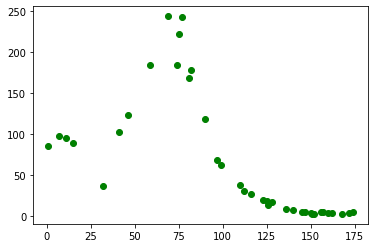

In [45]:
plt.scatter(X_test['Day'],y_pred, color="g")

In [43]:
from sklearn import metrics

metrics.mean_squared_error(y_test, y_pred)

200.83836578947378

In [44]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

14.171745333214036